<a href="https://colab.research.google.com/github/KaushikPalani/Classification_of_bearing_faults_using_ML/blob/main/ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Load necessary packages and libraries 

In [1]:
import scipy.io 
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models



Import Data  

In [2]:
def ImportData():
  X99_normal = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/99.mat')['X099_DE_time']              
  X111_InnerRace_007 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/111.mat')['X111_DE_time']
  X124_Ball_007 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/124.mat')['X124_DE_time']
  X137_Outer_007 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/137.mat')['X137_DE_time']
  X176_InnerRace_014 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/176.mat')['X176_DE_time']
  X191_Ball_014 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/191.mat')['X191_DE_time']
  X203_Outer_014 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/203.mat')['X203_DE_time']
  X215_InnerRace_021 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/215.mat')['X215_DE_time']
  X228_Ball_021 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/228.mat')['X228_DE_time']
  X240_Outer_021 = scipy.io.loadmat('C:/Users/Dev/Documents/Classification_of_bearing_faults_using_ML-main1/BearingData_CaseWestern/240.mat')['X240_DE_time']
  return [X99_normal,X111_InnerRace_007,X124_Ball_007,X137_Outer_007,X176_InnerRace_014,X191_Ball_014,X203_Outer_014,X215_InnerRace_021,X228_Ball_021,X240_Outer_021]

def Sampling(Data, interval_length, samples_per_block):
  # Calculate the number of blocks that can be sampled based on the interval length 
  No_of_blocks = (round(len(Data)/interval_length) - round(samples_per_block/interval_length)-1)
  SplitData = np.zeros([No_of_blocks, samples_per_block])
  for i in range(No_of_blocks):
    SplitData[i,:] = (Data[i*interval_length:(i*interval_length)+samples_per_block]).T
  return SplitData


def DataPreparation(Data, interval_length, samples_per_block):
  for count,i in enumerate(Data):
    SplitData = Sampling(i, interval_length, samples_per_block)
    y = np.zeros([len(SplitData),10])
    y[:,count] = 1
    y1 = np.zeros([len(SplitData),1])
    y1[:,0] = count
    # Stack up and label the data   
    if count==0:
      X = SplitData
      LabelPositional = y
      Label = y1
    else:
      X = np.append(X, SplitData, axis=0)
      LabelPositional = np.append(LabelPositional,y,axis=0)
      Label = np.append(Label,y1,axis=0)
  return X, LabelPositional, Label


Data = ImportData()
interval_length = 200  
samples_per_block = 1681


# Y_CNN is of shape (n, 10) representing 10 classes as 10 columns. In each sample, for the class to which it belongs, 
# the corresponding column value is marked 1 and the rest as 0, facilitating Softmax implementation in CNN 
# Y is of shape (m, 1) where column values are between 0 and 9 representing the classes directly. - 1-hot encoding
X, Y_CNN, Y = DataPreparation(Data, interval_length, samples_per_block) 


print('Shape of Input Data =', X.shape)
print('Shape of Label Y_CNN =', Y_CNN.shape)
print('Shape of Label Y =', Y.shape)

Shape of Input Data = (24276, 1681)
Shape of Label Y_CNN = (24276, 10)
Shape of Label Y = (24276, 1)


Export Input Data to MATLAB


*   For feature Extraction - time and frequency domain analysis  
*   For implementing Self Organizing Feature Maps using MATLAB 'nctool' feature



In [3]:
XX = {'X':X}
scipy.io.savemat('Data.mat', XX)

K-Fold Cross Validation 

In [4]:
# k-fold cross validation 
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)


In [10]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model

# Reshape the data - 1 dimensional feed 
Input_1D = X.reshape([-1, 1681, 1])

# Test-Train Split 
X_1D_train, X_1D_test, y_1D_train, y_1D_test = train_test_split(Input_1D, Y_CNN, train_size=0.75, test_size=0.25, random_state=101)

# Define the CNN Classification model
class CNN_1D():
    def __init__(self):
        self.model = self.CreateModel()

    def CreateModel(self):
        model = models.Sequential([
            layers.Conv1D(filters=16, kernel_size=3, strides=2, activation='relu'),
            layers.MaxPool1D(pool_size=2),
            layers.Conv1D(filters=32, kernel_size=3, strides=2, activation='relu'),
            layers.MaxPool1D(pool_size=2),
            layers.Conv1D(filters=64, kernel_size=3, strides=2, activation='relu'),
            layers.MaxPool1D(pool_size=2),
            layers.Conv1D(filters=128, kernel_size=3, strides=2, activation='relu'),
            layers.MaxPool1D(pool_size=2),
            layers.Flatten(),
            layers.InputLayer(),
            layers.Dense(100, activation='relu'),
            layers.Dense(50, activation='relu'),
            layers.Dense(10),
            layers.Softmax()
        ])
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
        return model

accuracy_1D = []

# Train the model 
for train, test in kfold.split(X_1D_train, y_1D_train):
    Classification_1D = CNN_1D()
    history = Classification_1D.model.fit(X_1D_train[train], y_1D_train[train], verbose=1, epochs=12)

    # Evaluate the accuracy of the model on the training set 
    kf_loss, kf_accuracy = Classification_1D.model.evaluate(X_1D_train[test], y_1D_train[test]) 
    accuracy_1D.append(kf_accuracy)

CNN_1D_train_accuracy = np.average(accuracy_1D) * 100
print('CNN 1D train accuracy =', CNN_1D_train_accuracy)

# Evaluate the accuracy of the model on the test set
CNN_1D_test_loss, CNN_1D_test_accuracy = Classification_1D.model.evaluate(X_1D_test, y_1D_test)
CNN_1D_test_accuracy *= 100
print('CNN 1D test accuracy =', CNN_1D_test_accuracy)

# Visualize the CNN1D model
plot_model(Classification_1D.model, to_file='CNN1D_model.png', show_shapes=True, show_layer_names=True)


Epoch 1/12
456/456 [==============================] - 8s 13ms/step - loss: 0.7994 - accuracy: 0.6874
Epoch 2/12
456/456 [==============================] - 6s 13ms/step - loss: 0.3918 - accuracy: 0.8227
Epoch 3/12
456/456 [==============================] - 6s 13ms/step - loss: 0.2565 - accuracy: 0.8861
Epoch 4/12
456/456 [==============================] - 6s 13ms/step - loss: 0.1308 - accuracy: 0.9484
Epoch 5/12
456/456 [==============================] - 6s 13ms/step - loss: 0.0788 - accuracy: 0.9697
Epoch 6/12
456/456 [==============================] - 6s 13ms/step - loss: 0.0428 - accuracy: 0.9843
Epoch 7/12
456/456 [==============================] - 6s 13ms/step - loss: 0.0429 - accuracy: 0.9848
Epoch 8/12
456/456 [==============================] - 6s 13ms/step - loss: 0.0310 - accuracy: 0.9891
Epoch 9/12
456/456 [==============================] - 6s 13ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 10/12
456/456 [==============================] - 5s 11ms/step - loss: 0.0179 - accura

ANN MODEL

In [5]:
# Reshape the data - 1 dimensional feed
X_ANN = X.reshape([-1, 1681])

In [6]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
Y_ANN = encoder.fit_transform(Y)

In [7]:
# Split the data into training and test sets
X_ANN_train, X_ANN_test, y_ANN_train, y_ANN_test = train_test_split(X_ANN, Y_ANN, train_size=0.75, test_size=0.25, random_state=101)


In [8]:
input_neurons = X_ANN_train.shape[1]
input_neurons

1681

In [10]:
# Define the ANN model
class ANN():
    def __init__(self):
        self.model = self.create_model()

    def create_model(self):
        model = models.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
        return model

# Train the ANN model
ANN_model = ANN()
history = ANN_model.model.fit(X_ANN_train, y_ANN_train, verbose=1, epochs=12)

# Evaluate the accuracy of the model on the training set
ANN_train_loss, ANN_train_accuracy = ANN_model.model.evaluate(X_ANN_train, y_ANN_train)
print('ANN train accuracy:', ANN_train_accuracy)

# Evaluate the accuracy of the model on the test set
ANN_test_loss, ANN_test_accuracy = ANN_model.model.evaluate(X_ANN_test, y_ANN_test)
print('ANN test accuracy:', ANN_test_accuracy)

Epoch 1/12
569/569 [==============================] - 2s 1ms/step - loss: 0.9424 - accuracy: 0.6789
Epoch 2/12
569/569 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9306
Epoch 3/12
569/569 [==============================] - 1s 1ms/step - loss: 0.1236 - accuracy: 0.9617
Epoch 4/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0922 - accuracy: 0.9731
Epoch 5/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 6/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0767 - accuracy: 0.9777
Epoch 7/12
569/569 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9836
Epoch 8/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0359 - accuracy: 0.9906
Epoch 9/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0466 - accuracy: 0.9874
Epoch 10/12
569/569 [==============================] - 1s 1ms/step - loss: 0.0625 - accuracy: 0.9820

**NEURAL NETWORK MODELS**

**1-Dimensional Convolutional Neural Network Classification**

In [11]:
# Reshape the data - 1 dimensional feed 
Input_1D = X.reshape([-1,1681,1])

# Test-Train Split 
X_1D_train, X_1D_test, y_1D_train, y_1D_test = train_test_split(Input_1D, Y_CNN, train_size=0.75,test_size=0.25, random_state=101)

# Define the CNN Classification model
class CNN_1D():
  def __init__(self):
    self.model = self.CreateModel()

  def CreateModel(self):
    model = models.Sequential([
        layers.Conv1D(filters=16, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Conv1D(filters=128, kernel_size=3, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2),
        layers.Flatten(),
        layers.InputLayer(),
        layers.Dense(100,activation='relu'),
        layers.Dense(50,activation='relu'),
        layers.Dense(10),
        layers.Softmax()
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model


accuracy_1D = []

# Train the model 
for train, test in kfold.split(X_1D_train,y_1D_train):
  Classification_1D = CNN_1D()
  history = Classification_1D.model.fit(X_1D_train[train], y_1D_train[train], verbose=1, epochs=12)

  # Evaluate the accuracy of the model on the training set 
  kf_loss, kf_accuracy = Classification_1D.model.evaluate(X_1D_train[test], y_1D_train[test]) 
  accuracy_1D.append(kf_accuracy)

CNN_1D_train_accuracy = np.average(accuracy_1D)*100
print('CNN 1D train accuracy =', CNN_1D_train_accuracy)


# Evaluate the accuracy of the model on the test set
CNN_1D_test_loss, CNN_1D_test_accuracy = Classification_1D.model.evaluate(X_1D_test, y_1D_test)
CNN_1D_test_accuracy*=100
print('CNN 1D test accuracy =', CNN_1D_test_accuracy)



Epoch 1/12
456/456 [==============================] - 5s 9ms/step - loss: 0.7715 - accuracy: 0.6964
Epoch 2/12
456/456 [==============================] - 4s 8ms/step - loss: 0.3276 - accuracy: 0.8483
Epoch 3/12
456/456 [==============================] - 4s 8ms/step - loss: 0.2151 - accuracy: 0.8989
Epoch 4/12
456/456 [==============================] - 3s 8ms/step - loss: 0.1491 - accuracy: 0.9350
Epoch 5/12
456/456 [==============================] - 3s 8ms/step - loss: 0.1028 - accuracy: 0.9592
Epoch 6/12
456/456 [==============================] - 3s 8ms/step - loss: 0.0581 - accuracy: 0.9784
Epoch 7/12
456/456 [==============================] - 3s 8ms/step - loss: 0.0508 - accuracy: 0.9804
Epoch 8/12
456/456 [==============================] - 3s 8ms/step - loss: 0.0410 - accuracy: 0.9866
Epoch 9/12
456/456 [==============================] - 4s 8ms/step - loss: 0.0289 - accuracy: 0.9887
Epoch 10/12
456/456 [==============================] - 3s 8ms/step - loss: 0.0269 - accuracy: 0.9903

Confusion Matrix Calculation

In [12]:
def ConfusionMatrix(Model, X, y):
  y_pred = np.argmax(Model.model.predict(X), axis=1)
  ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
  return ConfusionMat

Plot results - CNN 1D

569/569 [==============================] - 2s 2ms/step


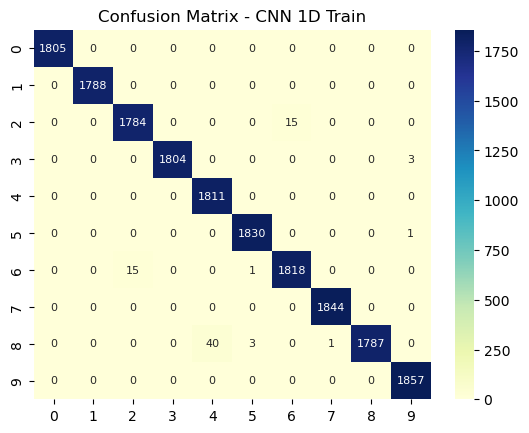

190/190 [==============================] - 1s 3ms/step


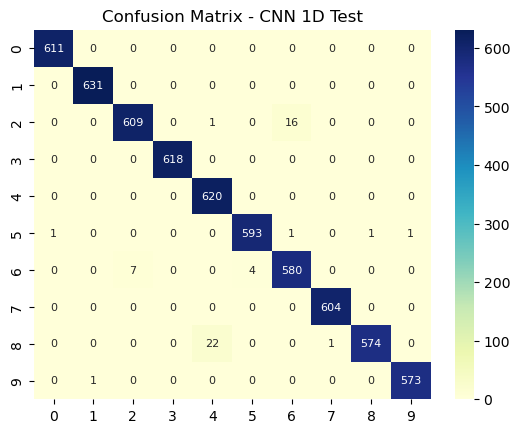

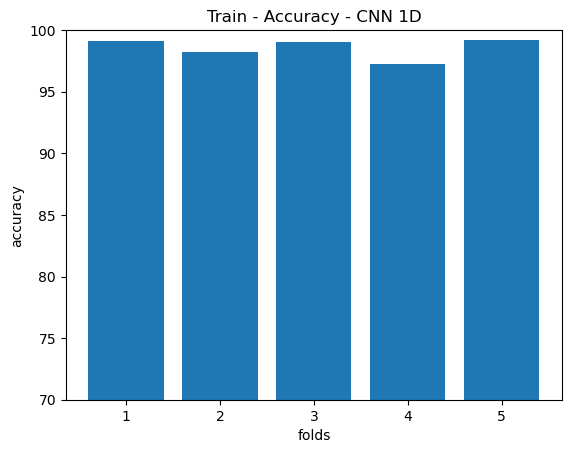

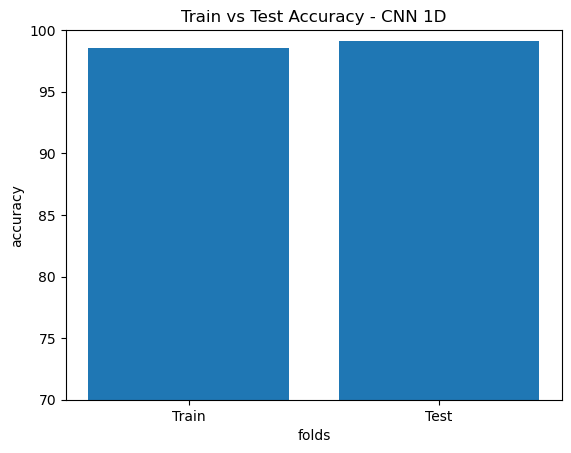

In [13]:
plt.figure(1)
plt.title('Confusion Matrix - CNN 1D Train') 
sns.heatmap(ConfusionMatrix(Classification_1D, X_1D_train, y_1D_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - CNN 1D Test') 
sns.heatmap(ConfusionMatrix(Classification_1D, X_1D_test, y_1D_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(3)
plt.title('Train - Accuracy - CNN 1D')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy_1D])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([70,100])
plt.show()

plt.figure(4)
plt.title('Train vs Test Accuracy - CNN 1D')
plt.bar([1,2],[CNN_1D_train_accuracy,CNN_1D_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([70,100])
plt.show()

**2-Dimensional Convolutional Neural Network Classification**

In [15]:
# Reshape the data - 2 dimensional feed 
Input_2D = X.reshape([-1,41,41,1])

# Test-Train Split 
X_2D_train, X_2D_test, y_2D_train, y_2D_test = train_test_split(Input_2D, Y_CNN, train_size=0.75,test_size=0.25, random_state=101)

# Define the CNN Classification model
class CNN_2D():
  def __init__(self):
    self.model = self.CreateModel()

  def CreateModel(self):
    model = models.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding ='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2), padding='same'),
        layers.Conv2D(filters=32, kernel_size=(3,3),strides=(2,2), padding ='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3),strides=(2,2),padding ='same', activation='relu'),
        layers.MaxPool2D(pool_size=(2,2), padding='same'),
        layers.Conv2D(filters=128, kernel_size=(3,3),strides=(2,2),padding ='same', activation='relu'),
        layers.MaxPool2D(pool_size=(2,2), padding='same'),
        layers.Flatten(),
        layers.InputLayer(),
        layers.Dense(100,activation='relu'),
        layers.Dense(50,activation='relu'),
        layers.Dense(10),
        layers.Softmax()
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model


accuracy_2D = []

# Train the model 
for train, test in kfold.split(X_2D_train,y_2D_train):
  Classification_2D = CNN_2D()
  history = Classification_2D.model.fit(X_2D_train[train], y_2D_train[train], verbose=1, epochs=12)

  # Evaluate the accuracy of the model on the training set 
  kf_loss, kf_accuracy = Classification_2D.model.evaluate(X_2D_train[test], y_2D_train[test]) 
  accuracy_2D.append(kf_accuracy)

CNN_2D_train_accuracy = np.average(accuracy_2D)*100
print('CNN 2D train accuracy =', CNN_2D_train_accuracy)


# Evaluate the accuracy of the model on the test set
CNN_2D_test_loss, CNN_2D_test_accuracy = Classification_2D.model.evaluate(X_2D_test, y_2D_test)
CNN_2D_test_accuracy*=100
print('CNN 2D test accuracy =', CNN_2D_test_accuracy)



Epoch 1/12
456/456 [==============================] - 3s 4ms/step - loss: 0.9595 - accuracy: 0.6242
Epoch 2/12
456/456 [==============================] - 2s 4ms/step - loss: 0.4858 - accuracy: 0.7991
Epoch 3/12
456/456 [==============================] - 2s 4ms/step - loss: 0.3331 - accuracy: 0.8700
Epoch 4/12
456/456 [==============================] - 2s 4ms/step - loss: 0.2643 - accuracy: 0.8949
Epoch 5/12
456/456 [==============================] - 2s 4ms/step - loss: 0.2150 - accuracy: 0.9164
Epoch 6/12
456/456 [==============================] - 2s 4ms/step - loss: 0.1712 - accuracy: 0.9355
Epoch 7/12
456/456 [==============================] - 2s 4ms/step - loss: 0.1273 - accuracy: 0.9541
Epoch 8/12
456/456 [==============================] - 2s 4ms/step - loss: 0.0913 - accuracy: 0.9674
Epoch 9/12
456/456 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9721
Epoch 10/12
456/456 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9707

Plot results - CNN 2D

569/569 [==============================] - 1s 1ms/step


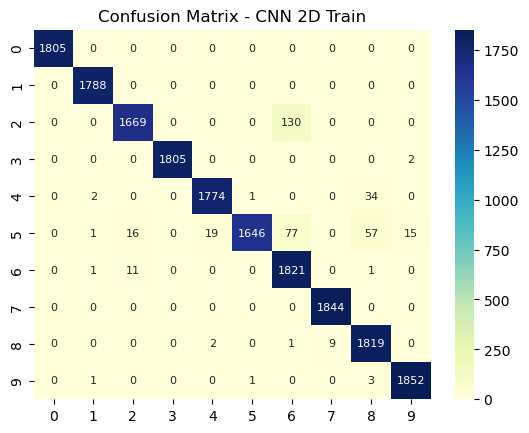

190/190 [==============================] - 0s 1ms/step


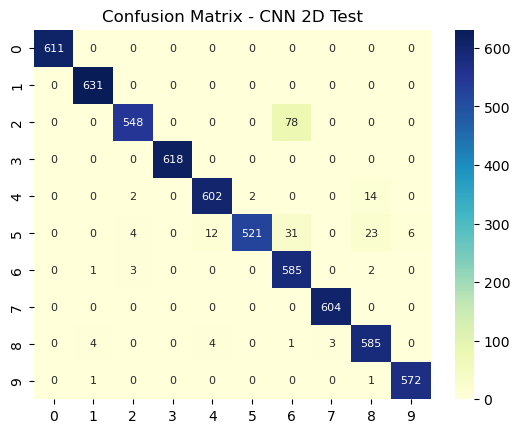

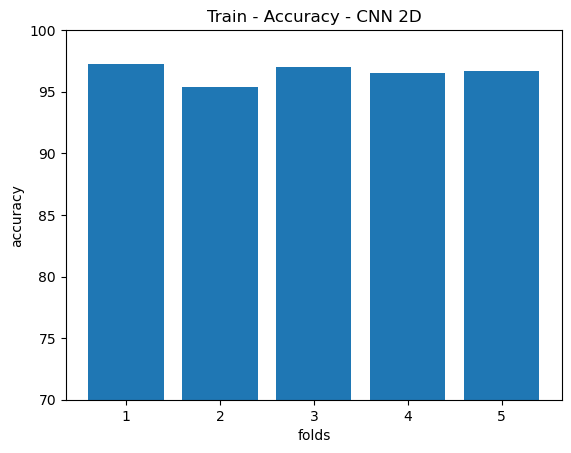

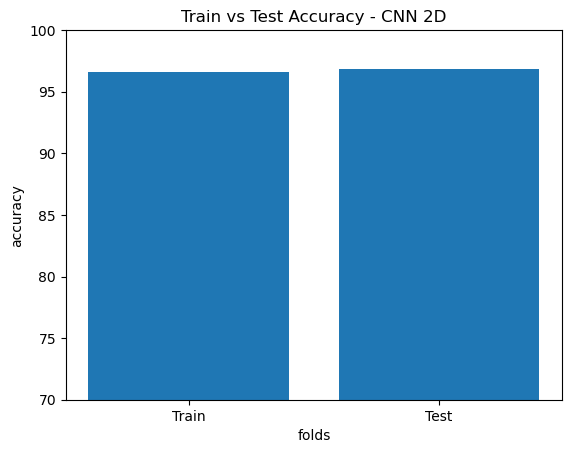

In [16]:
plt.figure(5)
plt.title('Confusion Matrix - CNN 2D Train') 
sns.heatmap(ConfusionMatrix(Classification_2D, X_2D_train, y_2D_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(6)
plt.title('Confusion Matrix - CNN 2D Test') 
sns.heatmap(ConfusionMatrix(Classification_2D, X_2D_test, y_2D_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(7)
plt.title('Train - Accuracy - CNN 2D')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy_2D])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([70,100])
plt.show()

plt.figure(8)
plt.title('Train vs Test Accuracy - CNN 2D')
plt.bar([1,2],[CNN_2D_train_accuracy,CNN_2D_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([70,100])
plt.show()

**Long Short-Term Memory Recurrent Neural Network Classification Model** 

In [17]:
# Reshape the data - 1 dimensional feed 
Input = X.reshape([-1,1681,1])

# Test-Train Split 
X_train, X_test, y_train, y_test = train_test_split(Input, Y_CNN, train_size=0.75,test_size=0.25, random_state=101)

# Define the LSTM Classification model
class LSTM_Model():
  def __init__(self):
    self.model = self.CreateModel()

  def CreateModel(self):
    model = models.Sequential([
        layers.LSTM(32, return_sequences=True),
        layers.Flatten(),
        layers.Dense(10),
        layers.Softmax()
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model


accuracy = []

# Train the model 
for train, test in kfold.split(X_train,y_train):
  Classification = LSTM_Model()
  history = Classification.model.fit(X_train[train], y_train[train], verbose=1, epochs=10, use_multiprocessing=True)

  # Evaluate the accuracy of the model on the training set 
  kf_loss, kf_accuracy = Classification.model.evaluate(X_train[test], y_train[test]) 
  accuracy.append(kf_accuracy)

LSTM_train_accuracy = np.average(accuracy)*100
print('LSTM train accuracy =', LSTM_train_accuracy)


# Evaluate the accuracy of the model on the test set
LSTM_test_loss, LSTM_test_accuracy = Classification.model.evaluate(X_test, y_test)
LSTM_test_accuracy*=100
print('LSTM test accuracy =', LSTM_test_accuracy)



Epoch 1/10
456/456 [==============================] - 140s 304ms/step - loss: 1.3171 - accuracy: 0.5212
Epoch 2/10
456/456 [==============================] - 138s 302ms/step - loss: 0.5240 - accuracy: 0.8122
Epoch 3/10
456/456 [==============================] - 137s 301ms/step - loss: 0.2483 - accuracy: 0.9125
Epoch 4/10
456/456 [==============================] - 137s 301ms/step - loss: 0.1642 - accuracy: 0.9401
Epoch 5/10
456/456 [==============================] - 137s 301ms/step - loss: 0.1240 - accuracy: 0.9552
Epoch 6/10
456/456 [==============================] - 137s 301ms/step - loss: 0.1125 - accuracy: 0.9618
Epoch 7/10
456/456 [==============================] - 137s 300ms/step - loss: 0.0950 - accuracy: 0.9691
Epoch 8/10
456/456 [==============================] - 137s 301ms/step - loss: 0.1027 - accuracy: 0.9677
Epoch 9/10
456/456 [==============================] - 137s 300ms/step - loss: 0.0768 - accuracy: 0.9747
Epoch 10/10
114/114 [==============================] - 9s 77ms/s

Plot results - LSTM Model

569/569 [==============================] - 76s 132ms/step


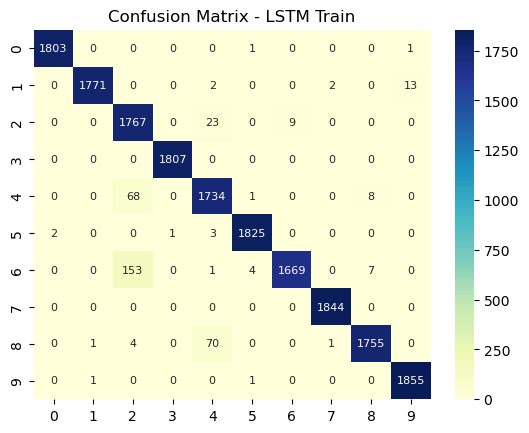

190/190 [==============================] - 26s 137ms/step


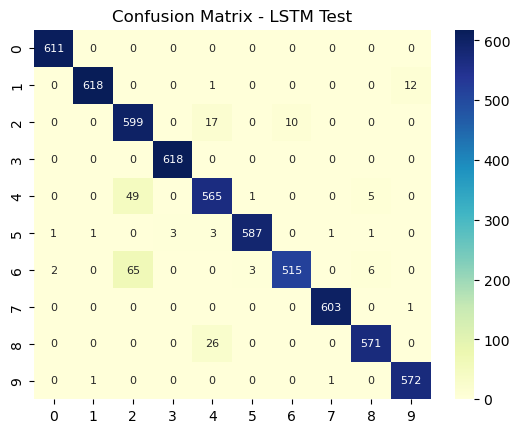

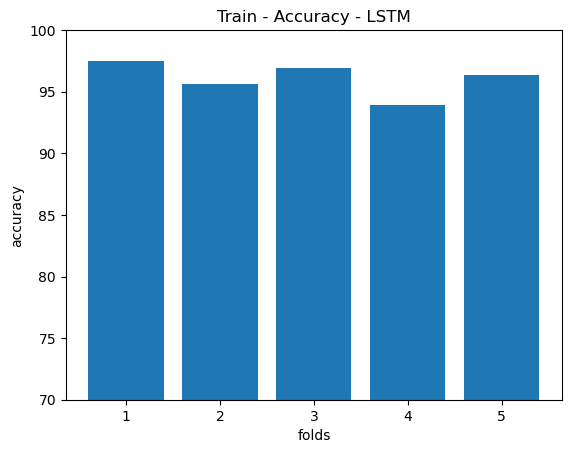

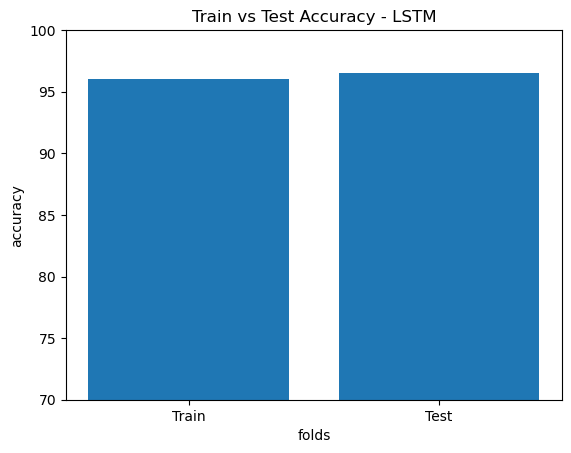

In [18]:

plt.figure(9)
plt.title('Confusion Matrix - LSTM Train') 
sns.heatmap(ConfusionMatrix(Classification, X_train, y_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(10)
plt.title('Confusion Matrix - LSTM Test') 
sns.heatmap(ConfusionMatrix(Classification, X_test, y_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(11)
plt.title('Train - Accuracy - LSTM')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([70,100])
plt.show()

plt.figure(12)
plt.title('Train vs Test Accuracy - LSTM')
plt.bar([1,2],[LSTM_train_accuracy,LSTM_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([70,100])
plt.show()

